In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [146]:
df_t = pd.read_csv("/content/drive/MyDrive/comsumer_temperature/datasets/temprature_2.csv")
df_t = df_t.drop(["Unnamed: 0"], axis=1)
df_t.head()

,年月日,平均気温(℃),POSIX,year,month,day,dayofweek,1dayago,2dayago,3dayago,...,5dayago,6dayago,7dayago,8dayago,9dayago,10dayago,11dayago,12dayago,13dayago,14dayago
0,2003-01-01,2.9,1041379200,2003,1,1,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2003-01-02,1.6,1041465600,2003,1,2,3,2.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2003-01-03,-0.8,1041552000,2003,1,3,4,1.6,2.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2003-01-04,4.0,1041638400,2003,1,4,5,-0.8,1.6,2.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2003-01-05,2.3,1041724800,2003,1,5,6,4.0,-0.8,1.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
df_c = pd.read_csv("/content/drive/MyDrive/comsumer_temperature/datasets/comsumption_2.csv")
df_c = df_c.drop(["Unnamed: 0", "日付コード", "日付"], axis=1)
df_c.head()

,支出,POSIX,年,月,1mago,2mago,3mago,4mago
0,11599,1420070400,2015,1,0.0,0.0,0.0,0.0
1,10397,1422748800,2015,2,11599.0,0.0,0.0,0.0
2,10802,1425168000,2015,3,10397.0,11599.0,0.0,0.0
3,10238,1427846400,2015,4,10802.0,10397.0,11599.0,0.0
4,10602,1430438400,2015,5,10238.0,10802.0,10397.0,11599.0


In [148]:
temperature = df_t.groupby(["year", "month"])["平均気温(℃)"].mean().reset_index()

In [149]:
temperature = temperature[temperature["year"] >= 2015].reset_index(drop=True)
temperature.tail()

,year,month,平均気温(℃)
101,2023,6,22.183333
102,2023,7,27.396774
103,2023,8,28.493548
104,2023,9,25.853333
105,2023,10,18.408333


In [150]:
temperature.shape

(106, 3)

In [151]:
consumption = df_c[df_c["年"] >= 2015 ].reset_index(drop=True)
consumption.tail()

,支出,POSIX,年,月,1mago,2mago,3mago,4mago
99,27006,1680307200,2023,4,27609.0,25697.0,26056.0,29865.0
100,27586,1682899200,2023,5,27006.0,27609.0,25697.0,26056.0
101,27533,1685577600,2023,6,27586.0,27006.0,27609.0,25697.0
102,29395,1688169600,2023,7,27533.0,27586.0,27006.0,27609.0
103,29398,1690848000,2023,8,29395.0,27533.0,27586.0,27006.0


In [152]:
consumption.shape

(104, 8)

In [153]:
temperature = temperature.iloc[:92, :]
temperature.tail()

,year,month,平均気温(℃)
87,2022,4,14.143333
88,2022,5,17.554839
89,2022,6,21.810000
90,2022,7,26.635484
91,2022,8,26.541935


In [154]:
temperature.shape

(92, 3)

In [155]:
df_merge =  pd.merge(temperature, consumption, left_index=True, right_index=True)
df_merge.to_csv("/content/drive/MyDrive/comsumer_temperature/datasets/temprature_consumption.csv")

In [156]:
N = len(df_merge["year"])
N_train = round(N * .8)
df_merge.head()

,year,month,平均気温(℃),支出,POSIX,年,月,1mago,2mago,3mago,4mago
0,2015,1,3.867742,11599,1420070400,2015,1,0.0,0.0,0.0,0.0
1,2015,2,3.882143,10397,1422748800,2015,2,11599.0,0.0,0.0,0.0
2,2015,3,8.729032,10802,1425168000,2015,3,10397.0,11599.0,0.0,0.0
3,2015,4,13.130000,10238,1427846400,2015,4,10802.0,10397.0,11599.0,0.0
4,2015,5,19.358065,10602,1430438400,2015,5,10238.0,10802.0,10397.0,11599.0


In [157]:
x = df_merge.drop(["支出"], axis=1)
X = x.values
y = df_merge["支出"].values

In [158]:
X_train, y_train = X[:N_train], y[:N_train]
X_test, y_test = X[N_train:], y[N_train:]

In [159]:
from sklearn.ensemble import RandomForestRegressor

In [160]:
rf = RandomForestRegressor(n_estimators=100,
                           random_state=0)

In [161]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [162]:
feature_importances = rf.feature_importances_
feature_importances

array([0.00309079, 0.01142037, 0.01080691, 0.52263287, 0.01432757,
       0.01436872, 0.10018531, 0.05871009, 0.01912807, 0.2453293 ])

In [163]:
df_feature = pd.DataFrame(feature_importances,
                          index=x.columns)

In [164]:
df_feature.sort_values(by=0, ascending=False)

,0
POSIX,0.522633
4mago,0.245329
1mago,0.100185
2mago,0.058710
3mago,0.019128
月,0.014369
年,0.014328
month,0.011420
平均気温(℃),0.010807
year,0.003091


In [165]:
X = df_merge.drop(["支出"], axis=1).values
y = df_merge["支出"].values

N = len(df_merge["POSIX"])
N_train = round(N * .8)

X_train, y_train = X[:N_train], y[:N_train]
X_test, y_test = X[N_train:], y[N_train:]

rf = RandomForestRegressor(n_estimators=100,
                           random_state=0)

rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

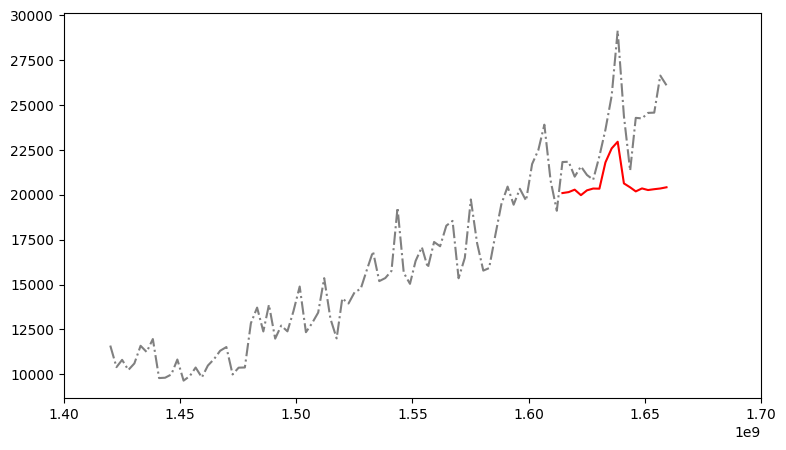

In [166]:
y_pred = rf.predict(X_test)
plt.figure(figsize=(9, 5))
plt.plot(X, y, color="gray", linestyle="dashdot")
plt.plot(X_test, y_pred, color="red")
plt.xlim([1.40e9, 1.70e9])
plt.show()

In [167]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(f"train R2: {rf.score(X_train, y_train):.2f}")
print(f"test R2: {rf.score(X_test, y_test):.2f}")

train R2: 0.99
test R2: -1.40
